In [1]:
# Input info
#outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/scrap/minC5_corr.Kendall.b/"
#se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
# se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/se_cells_meta_labels.tsv"
# outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/fate_corr/minC5_corr.Kendall.b_group_inputOnly/"

se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/se_cells_meta_labels.tsv" 
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/fate_correlation/minC5_corr.Kendall.b"
min_cell = 5 
to_group = False
use_input = False


# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/scrap2/minC5_corr.Kendall.b/"
# use_input = False
# min_cell = 5

input_col = "Input"
corr_method = "kendall_b"
to_rm_zero = False
pseudocount = 1



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np
from mplh.fig_utils import helper_save as hs

fig_utils from mplh


In [3]:
sns.set(font_scale = 1.3)


In [4]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [5]:
def get_clone_count(x, clone_counts):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]


In [6]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].astype(object).astype(str)



### Remove None before normalizing
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]

if to_group:
    se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
    
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Input_AAACGAAAGGAAACTT-1,Input,2831,2831,49701.0,5002,164,92,1138,37812,5493,...,2,3505,2884,AAACGAAAGGAAACTT-1_Input,Input_AAACGAAAGGAAACTT-1,28,2,Input,2_28,2
Input_AAACGAAGTCCAAGAG-1,Input,4565,4565,62869.0,9096,249,139,1902,42086,9397,...,0,6161,4469,AAACGAAGTCCAAGAG-1_Input,Input_AAACGAAGTCCAAGAG-1,6,0,Input,0_6,0
Input_AAACGAAGTCCGAGCT-1,Input,7229,7229,60574.0,11583,352,141,2087,31767,14644,...,1,9778,6201,AAACGAAGTCCGAGCT-1_Input,Input_AAACGAAGTCCGAGCT-1,2,0,Input,0_2,1
Input_AAACGAAGTTTGAAGA-1,Input,7001,7001,68829.0,12010,432,163,2209,39985,14030,...,1,9266,5942,AAACGAAGTTTGAAGA-1_Input,Input_AAACGAAGTTTGAAGA-1,9,2,Input,2_9,1
Input_AAACGAATCCCAGTAA-1,Input,2103,2103,30056.0,2764,124,63,832,22385,3888,...,2,2540,2215,AAACGAATCCCAGTAA-1_Input,Input_AAACGAATCCCAGTAA-1,0,3,Input,3_0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flt3l_TTGCGGGAGGAGTCTG-1,Flt3l,5971,5971,174156.0,34892,721,920,3749,124614,9260,...,9,7434,4940,TTGCGGGAGGAGTCTG-1_Flt3l,Flt3l_TTGCGGGAGGAGTCTG-1,3,2,Flt3l,2_3,9
Flt3l_TTTACGTCAAGCCAGA-1,Flt3l,11448,11448,182315.0,52255,868,810,6497,102392,19493,...,9,15750,8280,TTTACGTCAAGCCAGA-1_Flt3l,Flt3l_TTTACGTCAAGCCAGA-1,4,2,Flt3l,2_4,9
Flt3l_TTTGAGGAGTCTCGAT-1,Flt3l,10815,10815,216547.0,60590,1237,834,8682,126811,18393,...,9,14395,7821,TTTGAGGAGTCTCGAT-1_Flt3l,Flt3l_TTTGAGGAGTCTCGAT-1,51,0,Flt3l,0_51,9
Flt3l_TTTGAGGGTTGCAGAG-1,Flt3l,11111,11111,182438.0,70126,1239,878,9648,79591,20956,...,9,16707,8735,TTTGAGGGTTGCAGAG-1_Flt3l,Flt3l_TTTGAGGGTTGCAGAG-1,32,0,Flt3l,0_32,9


In [7]:
palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}



In [8]:
clone_counts = (se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size()+pseudocount).reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1, args=(clone_counts,))),axis=1).fillna(0)

def convert_log2(df):
    log2_df = df.copy()
    log2_df[hue_order] = np.log2(1+log2_df[hue_order])
    return log2_df
     


## Fate correlation

In [9]:
## Get top, middle, and bottom 2 correlations - Conditions combined

def repr_vals(x, n=2):
    """Get top, middle, and bottom 2 correlations - Conditions combined
    
    Assumes values are sorted
    """
    x_len = len(x)
    top = x[:min(len(x),n)]
    bot = []
    if x_len >= n*2:
        bot = x[::-1][:n]
        mid = []
        if x_len >= n*3:
            mid = x[int((len(x)/2)-(n/2)): int((len(x)/2)+(n/2))]
    return np.concatenate((top, bot, mid))


def top_vals(x, n=5):
    """Assumes values are sorted"""
    x_len = len(x)
    return x[:min(len(x),n)]


def repr_df(corr_vals, all_corr_df):
    repr_corr = all_corr_df.isin(corr_vals)
    repr_corr_inds = repr_corr[repr_corr > 0].stack().index.tolist()
    repr_corr_inds_df = pd.DataFrame(repr_corr_inds)
    repr_corr_inds_df["nm"] = repr_corr_inds_df.apply(lambda x: "-MERGE-".join(np.sort(x.values)), axis=1)

    repr_corr_inds_df = repr_corr_inds_df.loc[~(repr_corr_inds_df.duplicated(subset=["nm"]))].drop("nm", axis=1)
    repr_corr_inds_df["spearman corr"] = repr_corr_inds_df.apply(lambda x: all_corr_df.loc[x[0], x[1]], axis=1)
    repr_corr_inds_df = repr_corr_inds_df.sort_values("spearman corr")[::-1]
    return repr_corr_inds_df

def corr_df_flatten(df):
    vals = np.sort(list(set(df.values.flatten())))[::-1]
    return vals[vals!=1] # remove the diagonals

def plot_repr_corr(df, all_corr_df, label, top=False, out_f=None):
    vals = corr_df_flatten(all_corr_df)
    if top:
        corr_vals = top_vals(vals, n=5) #top, middle, and bottom n correlations
    else:
        corr_vals = repr_vals(vals, n=2) #top, middle, and bottom n correlations
    repr_corr_inds_df = repr_df(corr_vals, all_corr_df)
    corr_cat_df = []
    for ind, val in repr_corr_inds_df.iterrows():
        curr = df.loc[:,[val[0], val[1]]].copy()
        curr["comp"] = f'{"__".join(curr.columns)} ({corr_method} r={val["spearman corr"]:.3f})'
        curr = curr.rename({val:str(ind) for ind, val in enumerate([val[0], val[1]])}, axis=1)
        corr_cat_df.append(curr)
        
    g = sns.lmplot(data=pd.concat(corr_cat_df,axis=0), x="0", y="1", hue="comp", height=12, scatter=True);
    plt.ylabel(label)
    plt.xlabel(label)
    plt.suptitle("Top, middle, and bottom 2 paired correlations")
    if top:
        plt.suptitle(f"Top 5 paired correlations")
    if out_f is not None:
        hs(out_f, to_pdf=True)
    return corr_cat_df

In [10]:
from scipy.stats import kendalltau, spearmanr

def kendalltau_b(x,y, met='corr'):
    if met == 'corr':
        return kendalltau(x, y, variant='b')[0]
    elif met == "pval":
        return kendalltau(x, y, variant='b')[1]
    

    
def filt_zero(x, y):
    if to_rm_zero:
        keep_inds = np.where((x!=0) & (y!=0))
        return x[keep_inds], y[keep_inds]
    return (x,y)

def get_corr(df, corr_method):
    df = df.copy().drop(["ncells", "donor"],axis=1, errors='ignore')
    if corr_method == "spearman":
        corr_df = df.corr(method=lambda x, y: spearmanr(*filt_zero(x, y))[0]).fillna(0) 
        pval_df = df.corr(method=lambda x, y: spearmanr(*filt_zero(x, y))[1]) - (np.eye(len(corr_df)))
    elif corr_method == "kendall_b":
        corr_df = df.corr(method=lambda x, y: kendalltau(*filt_zero(x, y), variant='b')[0]).fillna(0)
        pval_df = df.corr(method=lambda x, y: kendalltau(*filt_zero(x, y), variant='b')[1]) - (np.eye(len(corr_df)))
        
    return corr_df, pval_df



### a) Donors in sequenced run combined (min_cell)

In [11]:
# #if rm_zero:
# def filt_zero(df, rm_zero):
#     if rm_zero:
#         df.loc[df.drop(["donor", "ncells"], axis=1)]
#         return 
        
#     return df

# def get_corr_np(corr_df):
#     corr_np = corr_df.to_numpy()  
#     correlations = []

#     print('{} - Calculating Correlation'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
#     for col_1 in range(corr_np.shape[-1]):
#         for col_2 in range(corr_np.shape[-1]):
#             if col_2 > col_1: #to not calculate duplicates, eg. (A, G) (G, A)
#                 # to remove rows when both are 0, eg. (0, 0)
#                 numpy_col_1 = corr_np[~((corr_np[:,col_1]==.0) & (corr_np[:,col_2]==.0)),col_1]
#                 numpy_col_2 = corr_np[~((corr_np[:,col_1]==.0) & (corr_np[:,col_2]==.0)),col_2]
#                 cor = np.corrcoef(numpy_col_1, numpy_col_2)[-1,0]
#                 correlations.append(cor)


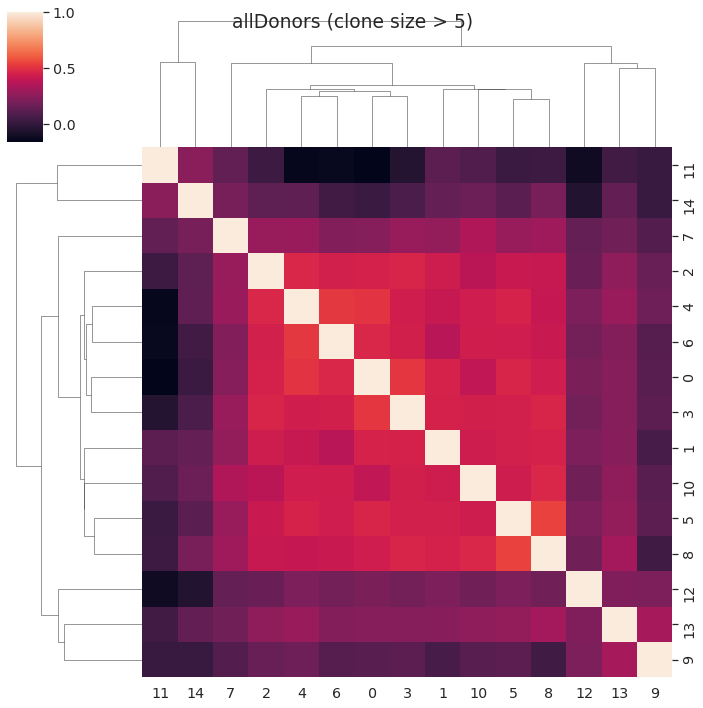

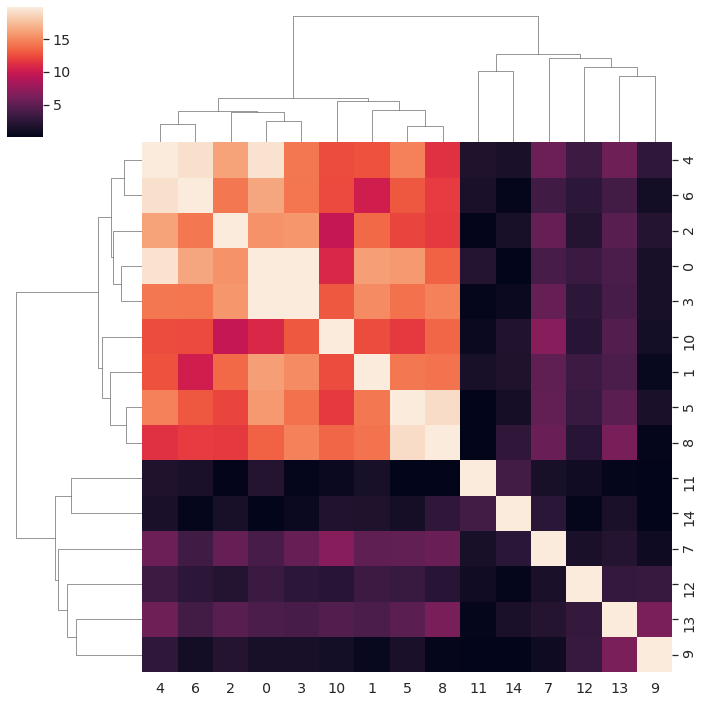

In [12]:
filt_clone_counts_df = convert_log2(keep_top_clones(clone_counts_df, min_cell=min_cell))
filt_clone_counts_df


all_corr_df, all_pval_df = get_corr(filt_clone_counts_df, corr_method)

all_corr_df
sns.clustermap(all_corr_df)
plt.suptitle(f"allDonors (clone size > {min_cell})")
hs(join(outdir, "fateCorr_allDonors.png"), to_pdf=True)

all_corr_df.to_csv(join(outdir, "correlation.csv"))

all_pval_vector = all_pval_df.values.flatten()
all_pval_vector = all_pval_vector[all_pval_vector!=0]
all_min_pval = all_pval_vector.min()
all_min_pval

all_log10pval_df = -np.log10(all_pval_df.apply(lambda x: x.apply(lambda y: all_min_pval if y < all_min_pval else y)))
all_log10pval_df
sns.clustermap(all_log10pval_df)#, mask = all_log10pval_df<1)

[              0         1                      comp
 name                                               
 1_0    4.954196  3.321928  5__8 (kendall_b r=0.545)
 0_1    3.321928  4.000000  5__8 (kendall_b r=0.545)
 3_0    4.000000  3.321928  5__8 (kendall_b r=0.545)
 0_0    3.321928  3.906891  5__8 (kendall_b r=0.545)
 0_2    3.000000  3.807355  5__8 (kendall_b r=0.545)
 ...         ...       ...                       ...
 0_55   0.000000  0.000000  5__8 (kendall_b r=0.545)
 0_83   0.000000  0.000000  5__8 (kendall_b r=0.545)
 0_67   1.584963  0.000000  5__8 (kendall_b r=0.545)
 0_69   0.000000  0.000000  5__8 (kendall_b r=0.545)
 0_129  0.000000  0.000000  5__8 (kendall_b r=0.545)
 
 [211 rows x 3 columns],
               0         1                      comp
 name                                               
 1_0    4.087463  4.000000  4__6 (kendall_b r=0.521)
 0_1    3.169925  2.321928  4__6 (kendall_b r=0.521)
 3_0    4.523562  4.000000  4__6 (kendall_b r=0.521)
 0_0    3.459432  0

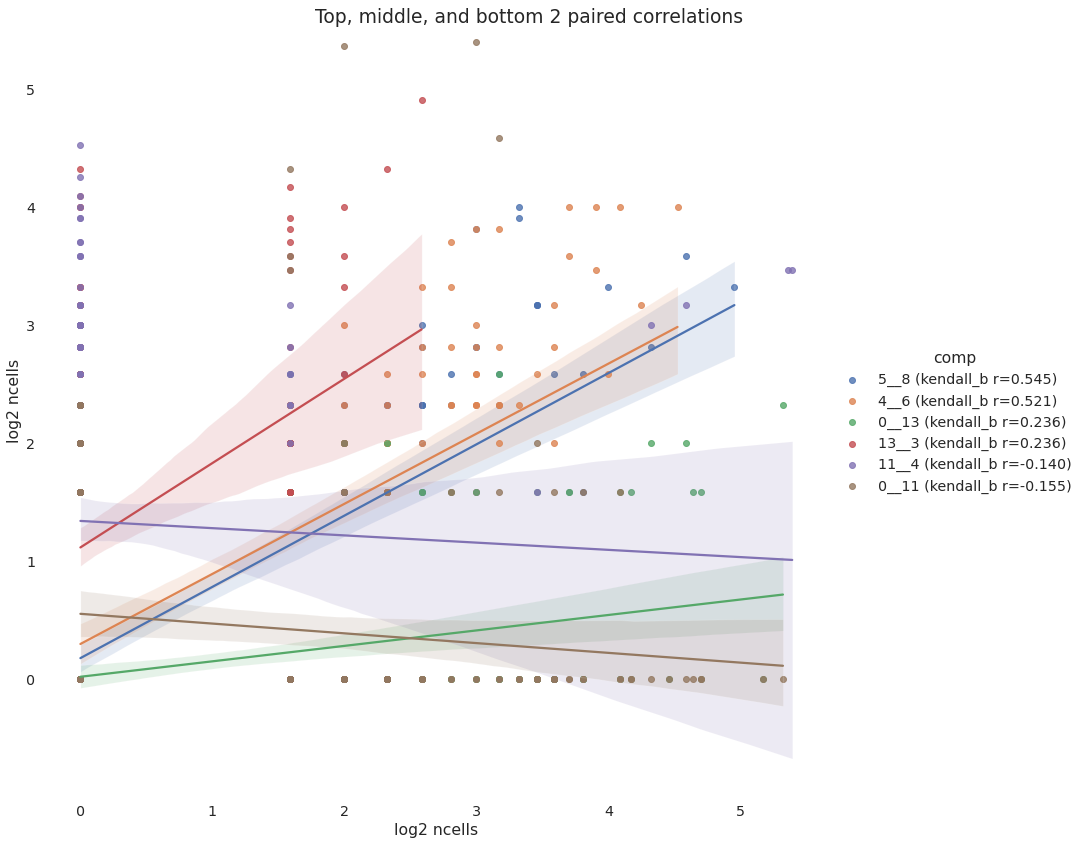

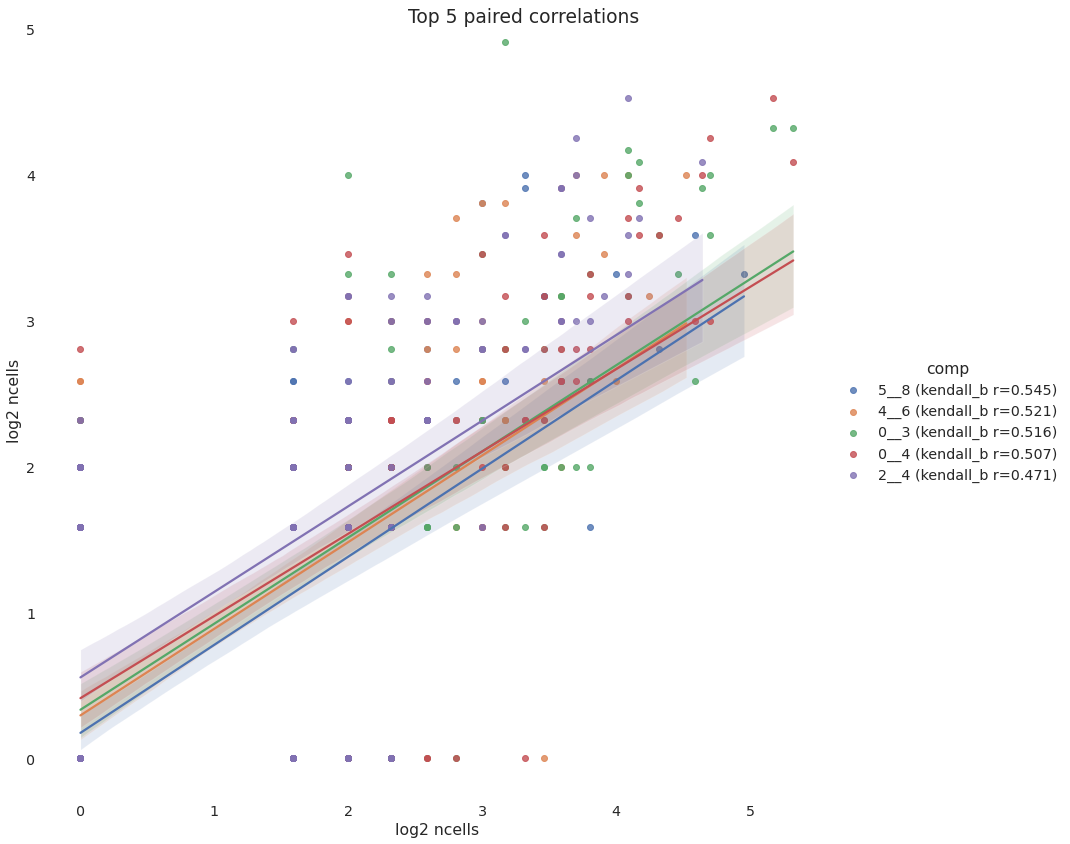

In [13]:
plot_repr_corr(filt_clone_counts_df, all_corr_df, label="log2 ncells", 
               out_f=join(outdir,"fateCorr_scatter_allDonors.png"))

plot_repr_corr(filt_clone_counts_df, all_corr_df, label="log2 ncells", top=True,
               out_f=join(outdir,"top_fateCorr_scatter_allDonors.png"))

### b) Separate donors, min_cell=min_cell

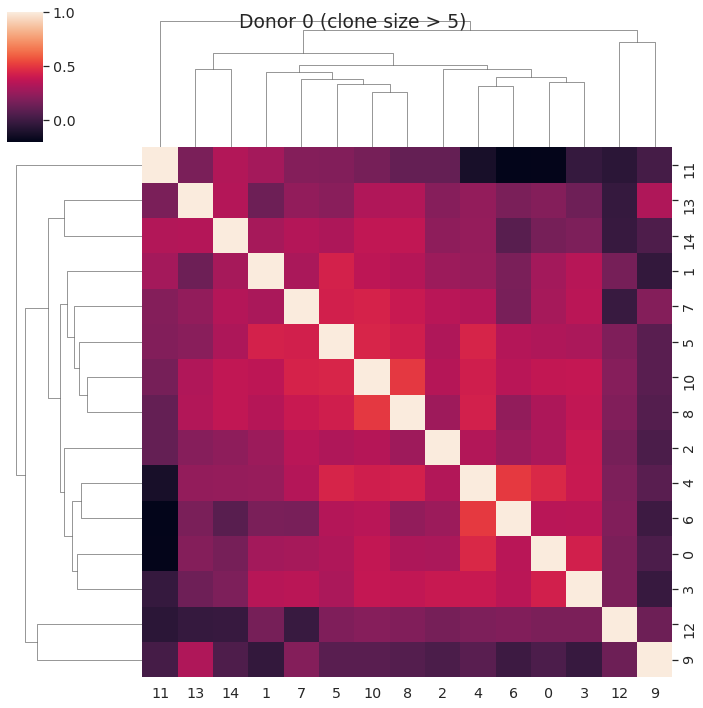

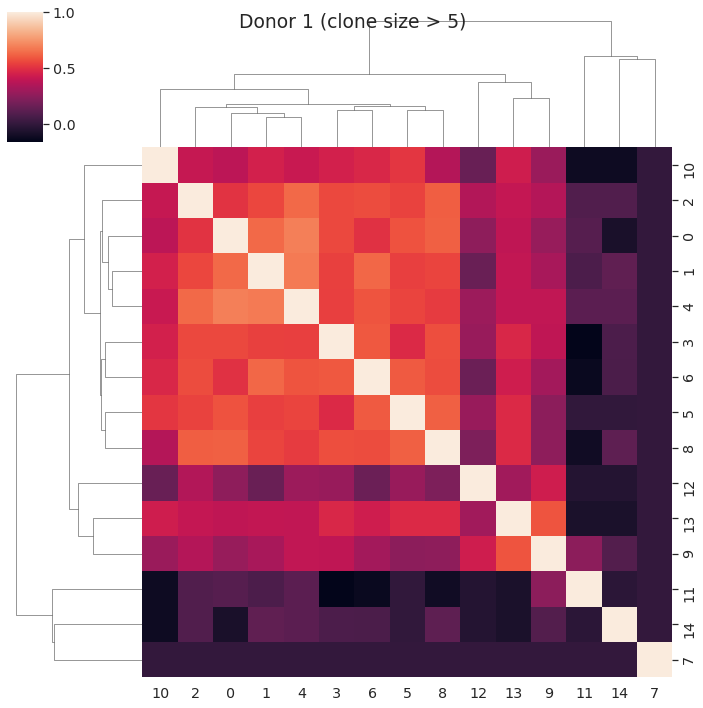

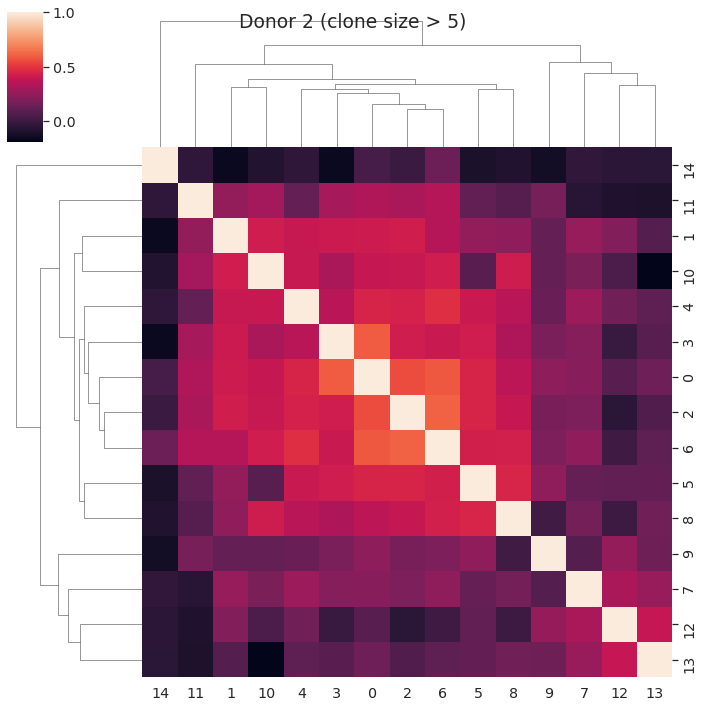

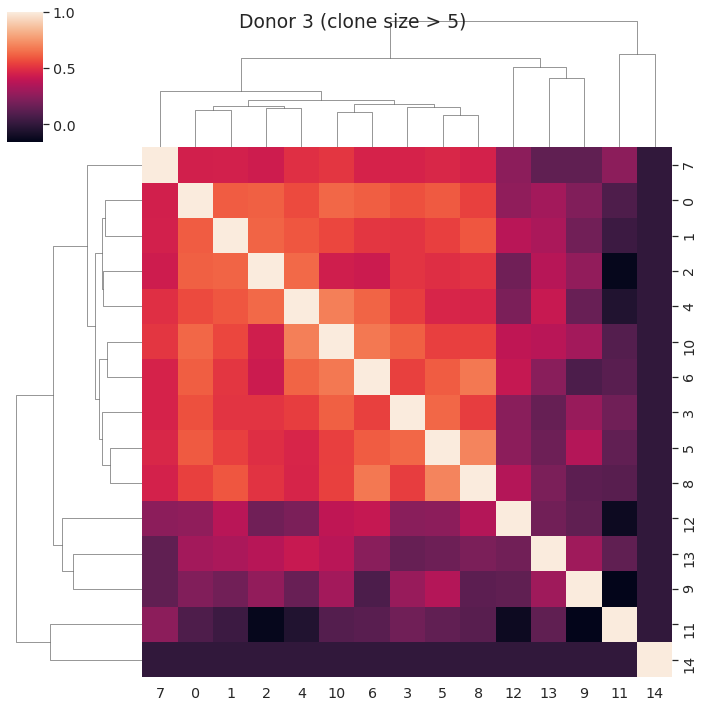

In [14]:
for don, val in clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=min_cell)
    #corr_df = np.log2(1+tmp.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
    corr_df, pval_df = get_corr(tmp, corr_method)
    corr_df

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > {min_cell})")
    hs(join(outdir, f"fateCorr_donor{don}.png"), to_pdf=True)


### c) Separate donors, min_cell is 50

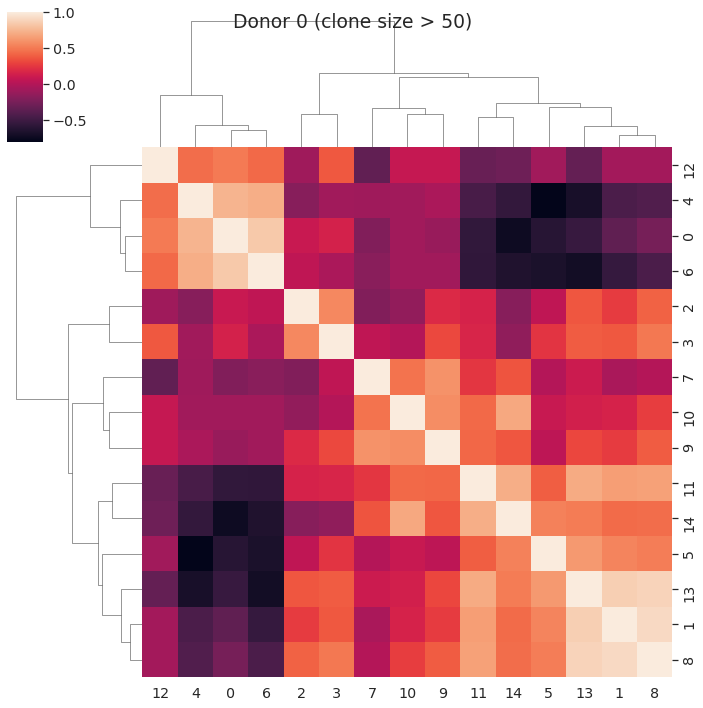

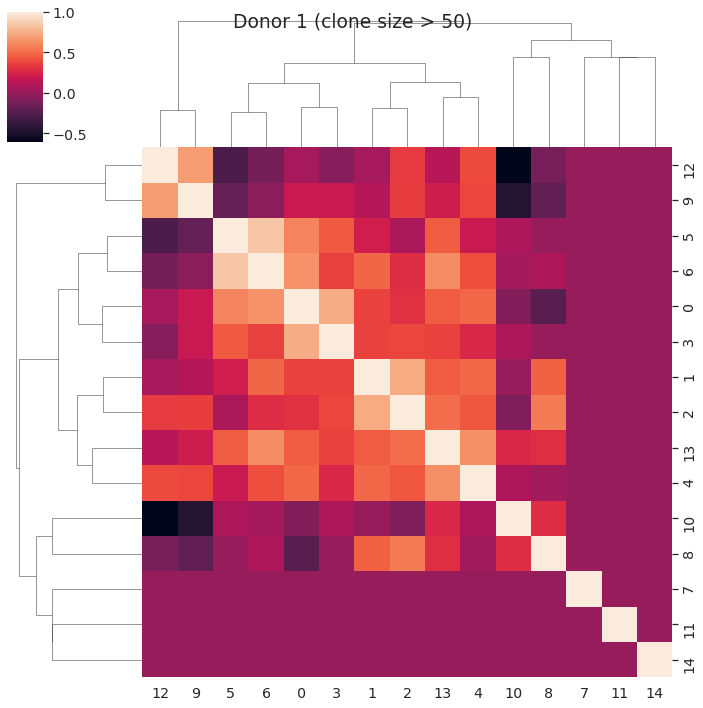

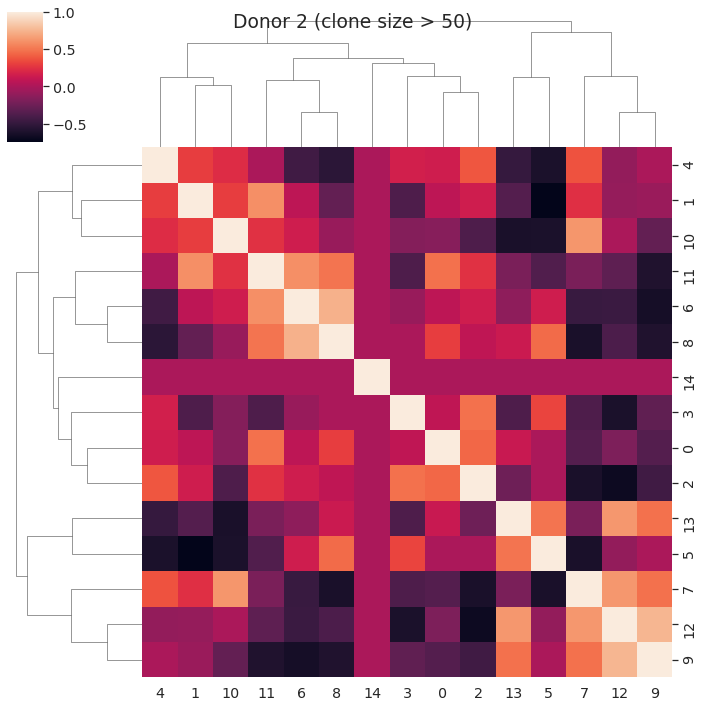

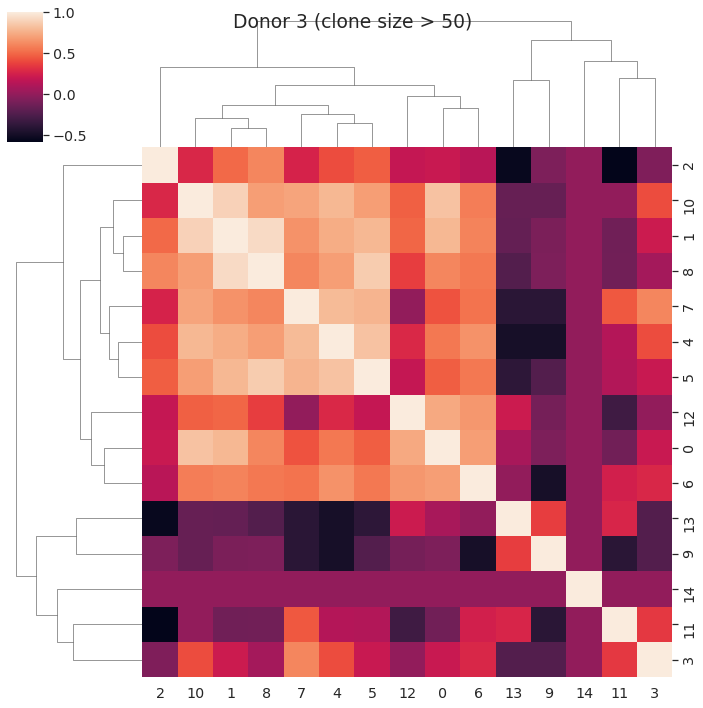

In [15]:
for don, val in clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=50)
    #corr_df = np.log2(1+tmp.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
    corr_df, pval_df = get_corr(tmp, corr_method)
    corr_df

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > 50)")

## Separate donors, no min_cell

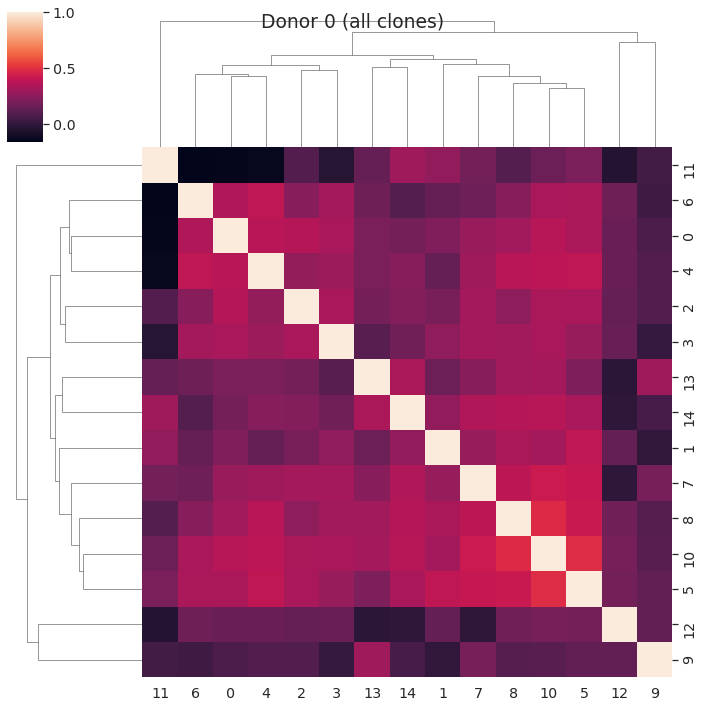

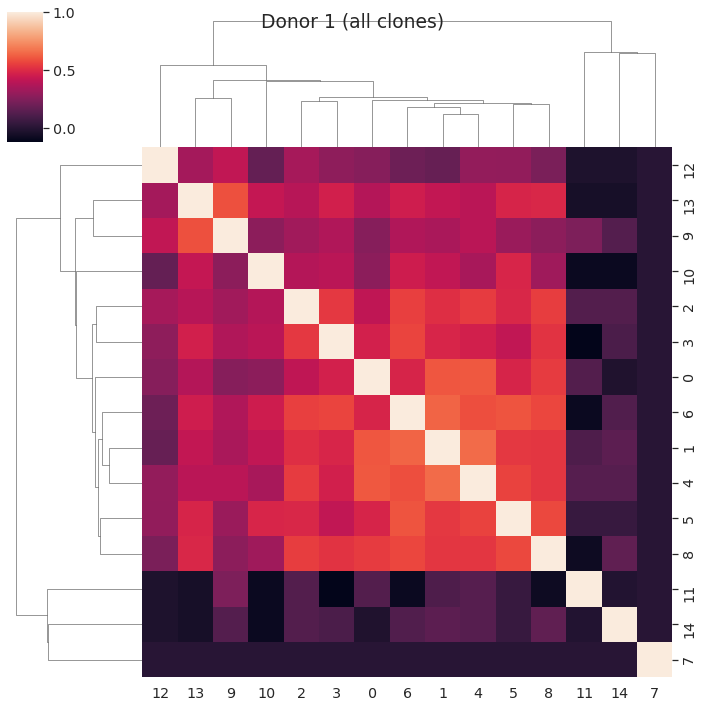

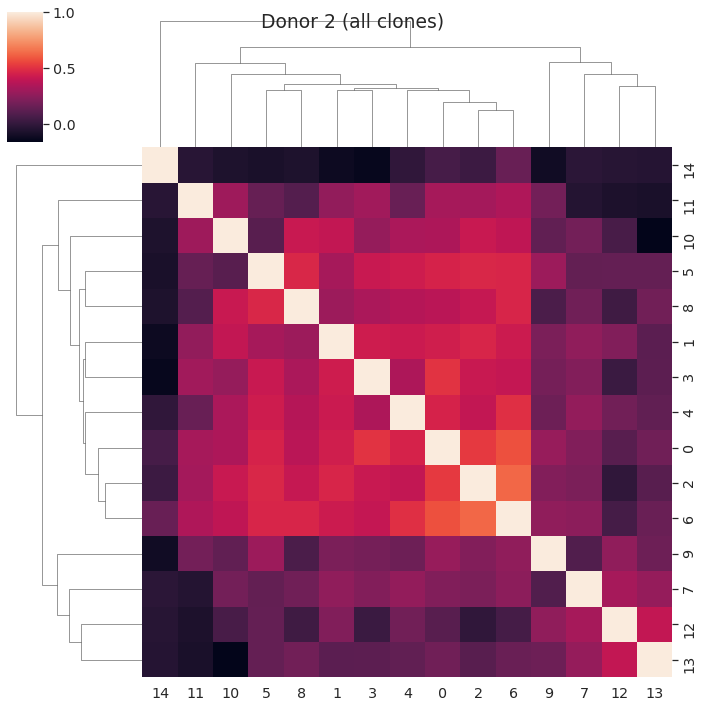

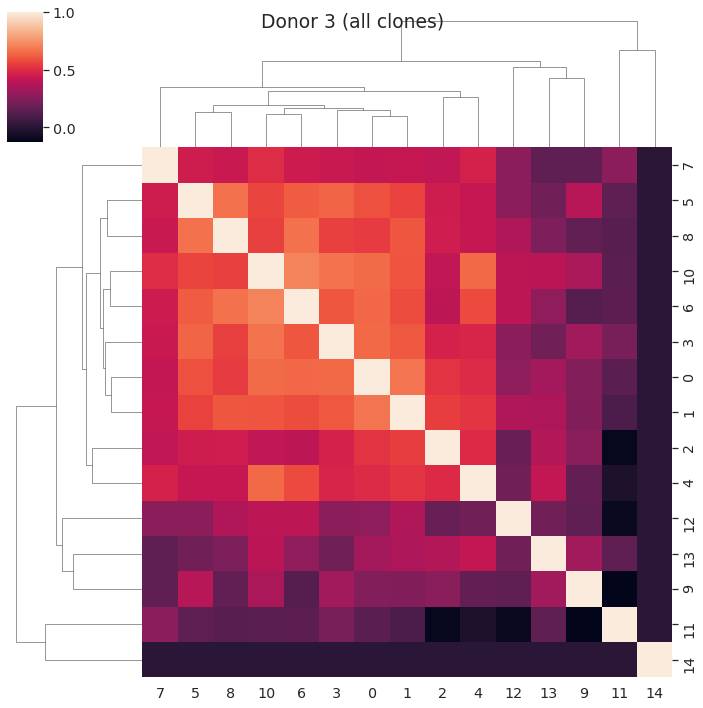

In [16]:
for don, val in clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=0)
    #corr_df = np.log2(1+val.drop(["ncells", "donor"],axis=1)).corr(method="spearman")
    corr_df, pval_df = get_corr(val, corr_method)
    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (all clones)")

### d) Normalize per donor, run donors together and separately

[             0         1                      comp
 name                                              
 2_0   0.010728  0.008719  2__4 (kendall_b r=0.584)
 2_0   0.010728  0.008719  2__4 (kendall_b r=0.584)
 2_1   0.007874  0.007368  2__4 (kendall_b r=0.584)
 2_2   0.000000  0.000000  2__4 (kendall_b r=0.584)
 2_1   0.007874  0.007368  2__4 (kendall_b r=0.584)
 ...        ...       ...                       ...
 0_5   0.003830  0.003205  2__4 (kendall_b r=0.584)
 0_7   0.003387  0.003830  2__4 (kendall_b r=0.584)
 0_16  0.000000  0.002999  2__4 (kendall_b r=0.584)
 0_17  0.000000  0.000000  2__4 (kendall_b r=0.584)
 0_8   0.002999  0.003205  2__4 (kendall_b r=0.584)
 
 [244 rows x 3 columns],
         0         1                       comp
 name                                          
 2_0   0.0  0.000000  10__8 (kendall_b r=0.556)
 2_0   0.0  0.000000  10__8 (kendall_b r=0.556)
 2_1   0.0  0.000000  10__8 (kendall_b r=0.556)
 2_2   0.0  0.000000  10__8 (kendall_b r=0.556)
 2_1   0.

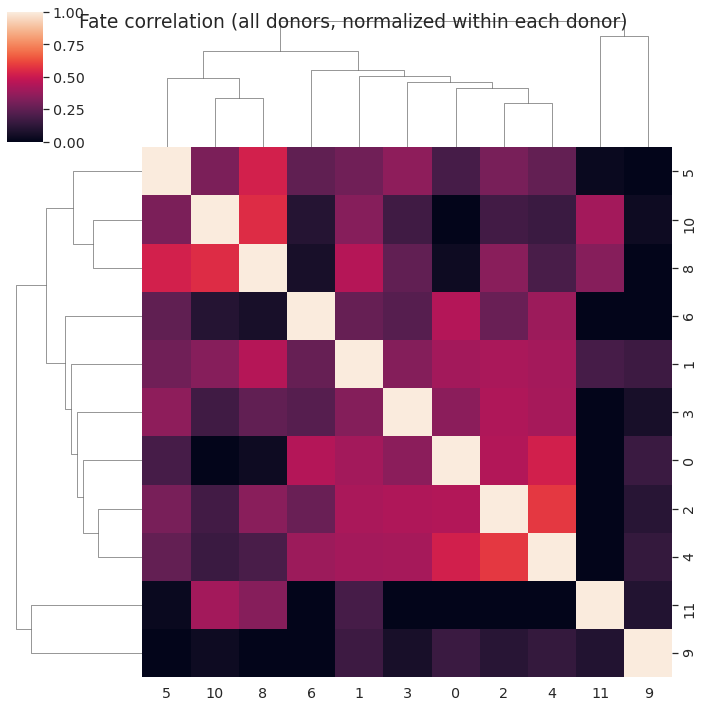

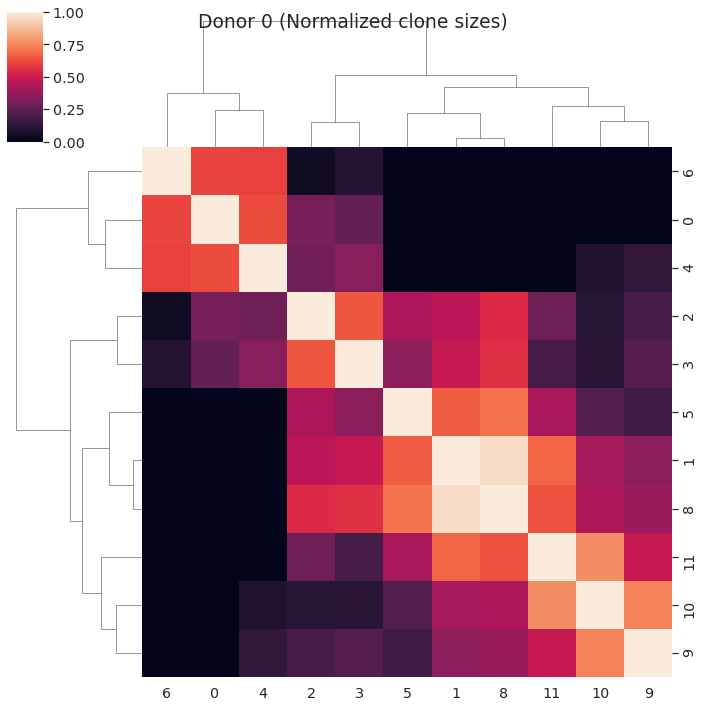

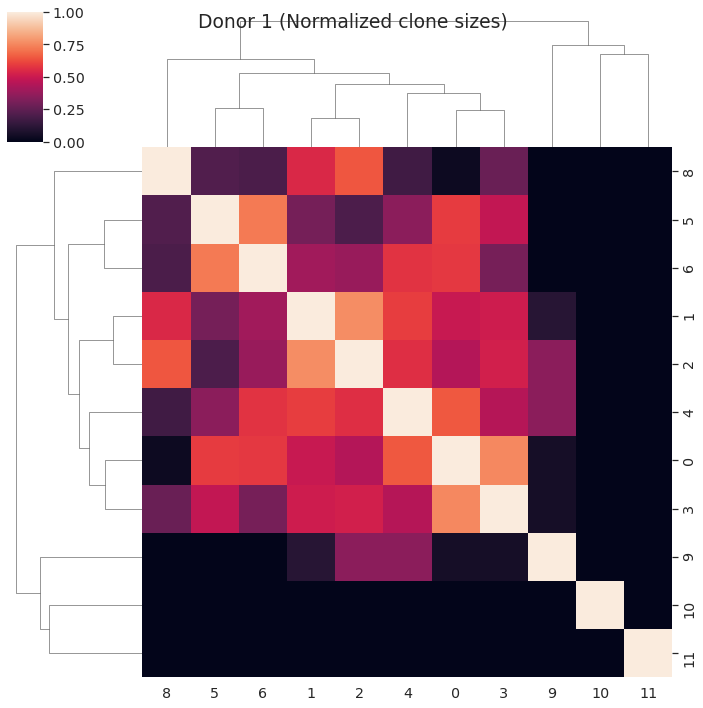

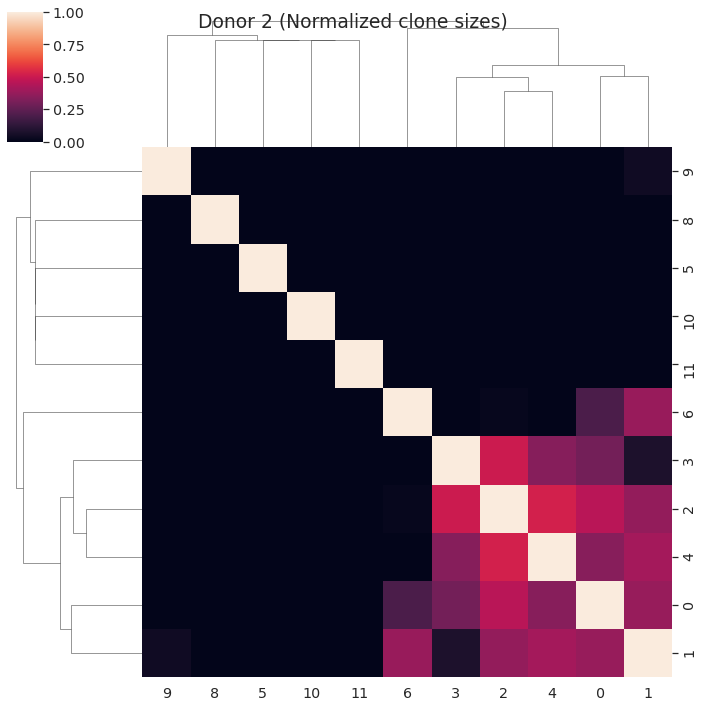

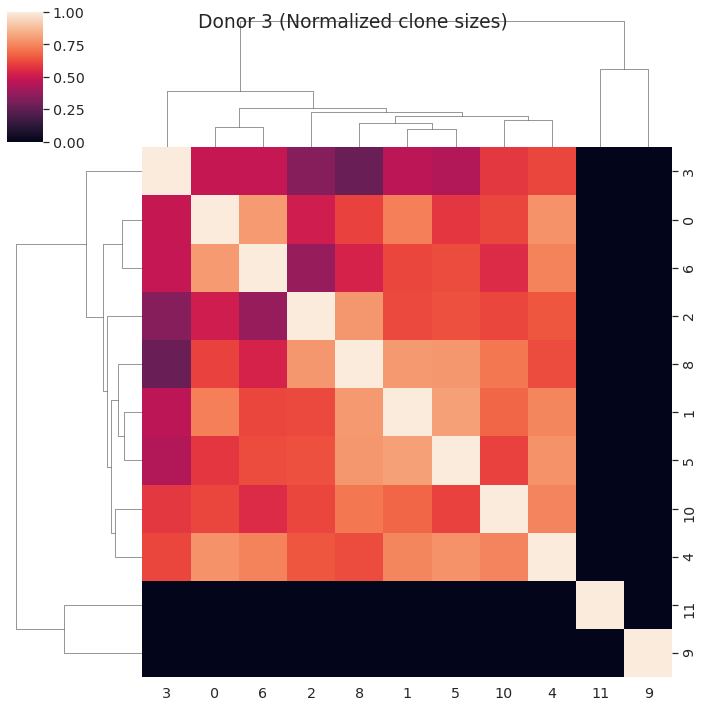

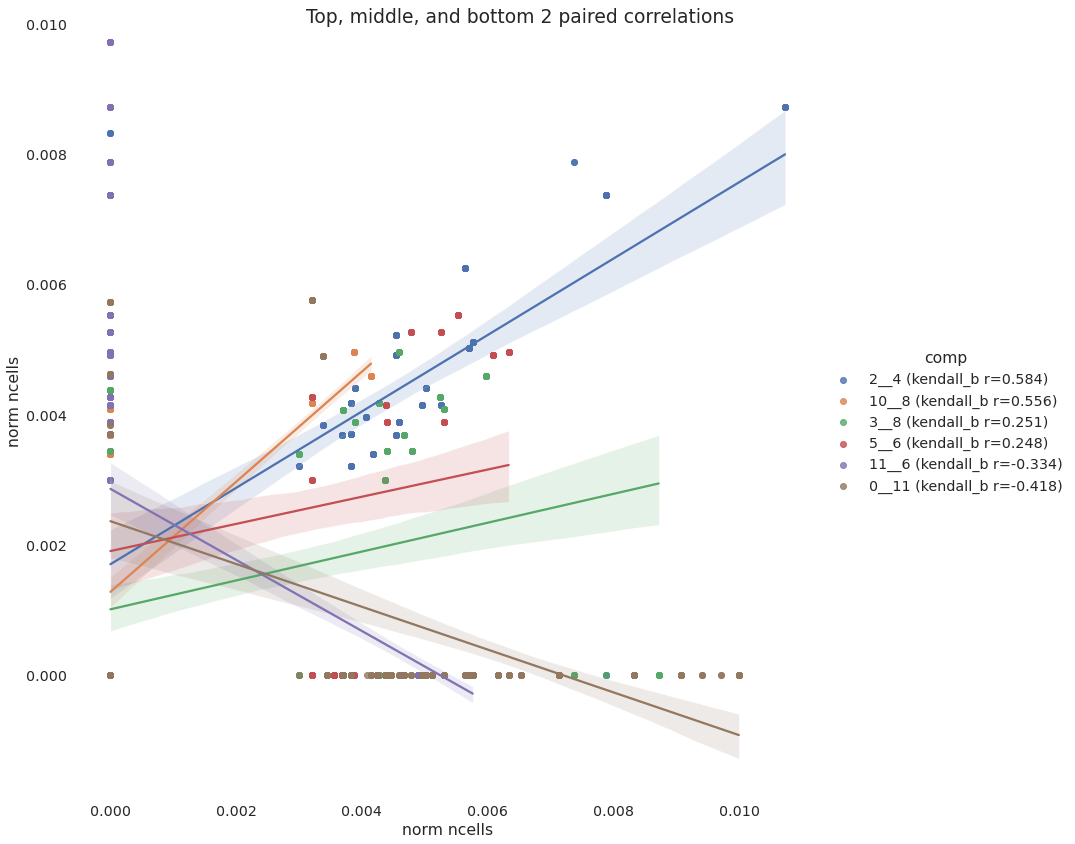

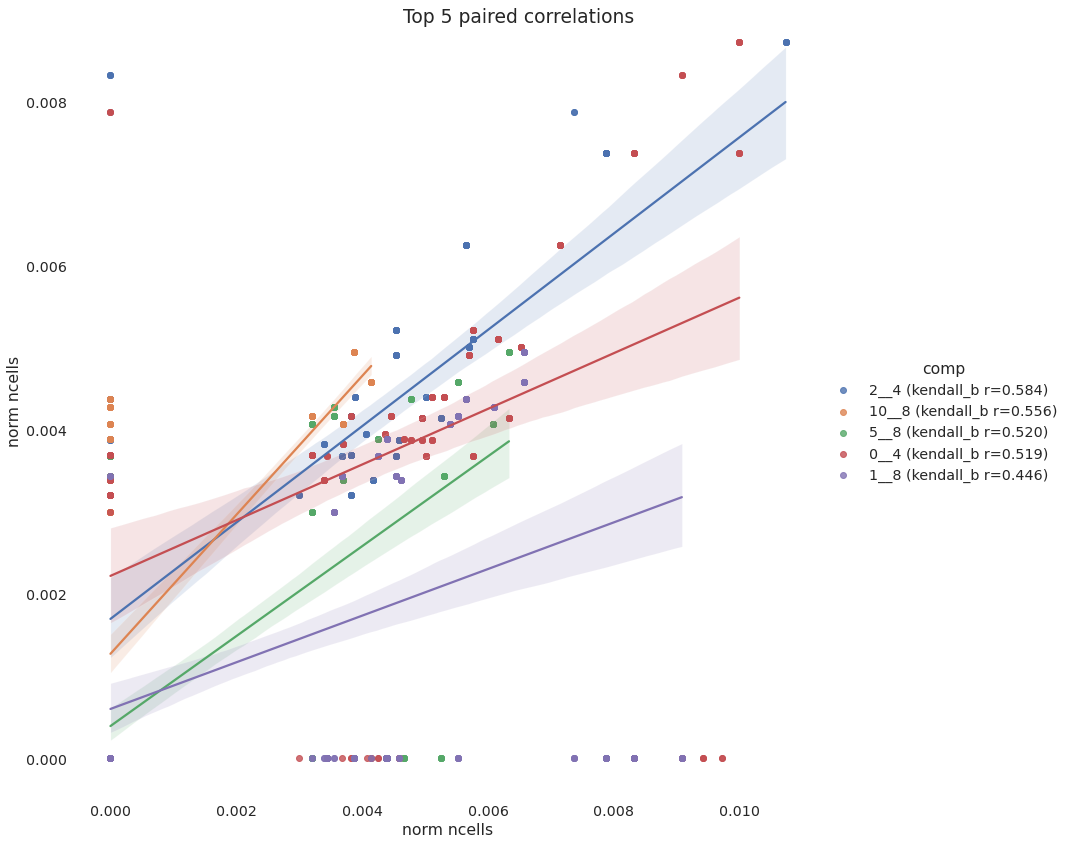

In [17]:
filt_clone_counts = keep_top_clones(clone_counts, min_cell=min_cell)
filt_clone_counts


clone_norm = filt_clone_counts.copy()

#clone_sums = clone_counts.groupby("name").sum()["ncells"]

clone_norm["ncells"] = np.log2(1+clone_norm["ncells"])
clone_sums = filt_clone_counts.groupby(["donor"]).sum()["ncells"]

clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["donor"])] , axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor", "nuclear_clusters"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
clone_norm_combined



clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1, args=(clone_norm,))),axis=1).fillna(0)
#norm_corr_df = clone_norm_df.drop(["ncells", "donor"],axis=1).corr(method="spearman")

norm_corr_df, norm_pval_df = get_corr(clone_norm_df, corr_method)

norm_corr_df.to_csv(join(outdir, "norm_correlation.csv"))


sns.clustermap(norm_corr_df.loc[(~norm_corr_df.isnull().all(axis=1)),(~norm_corr_df.isnull().all())], vmin=0, vmax=1)
plt.suptitle("Fate correlation (all donors, normalized within each donor)")
hs(join(outdir, "norm_allDonors.png"), to_pdf=True)

for don, val in clone_norm_df.groupby("donor"):
    #corr_df = val.drop(["ncells", "donor"],axis=1).corr(method="spearman")
    corr_df, pval_df = get_corr(val, corr_method)
    sns.clustermap(corr_df.loc[(~corr_df.isnull().all(axis=1)),(~corr_df.isnull().all())].fillna(0), vmin=0, vmax=1)
    plt.suptitle(f"Donor {don} (Normalized clone sizes)")

plot_repr_corr(clone_norm_df, norm_corr_df, label="norm ncells", out_f=join(outdir, "norm_fateCorr_scatter_allDonors.png"))

plot_repr_corr(clone_norm_df, norm_corr_df, label="norm ncells", top=True, 
               out_f=join(outdir, "top_norm_fateCorr_scatter_allDonors.png"))

## Normalize but within each clone as well

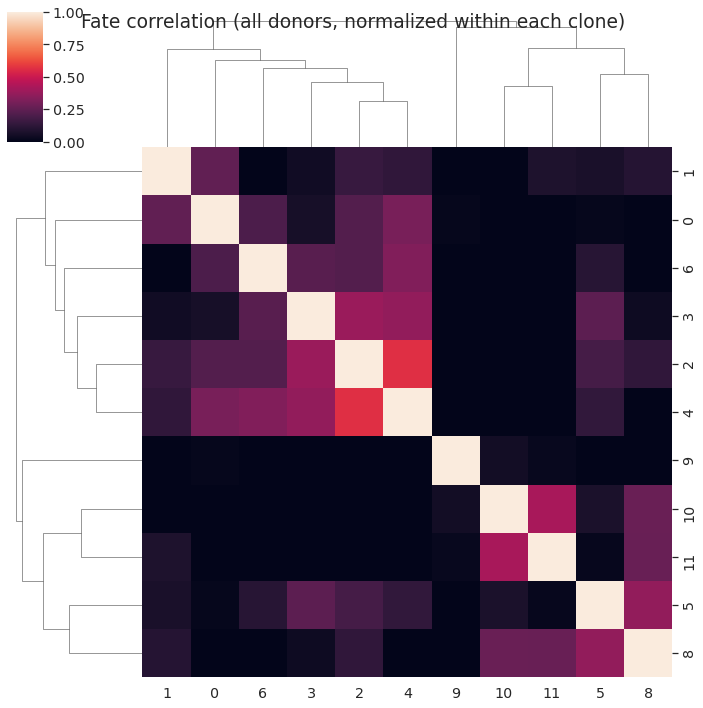

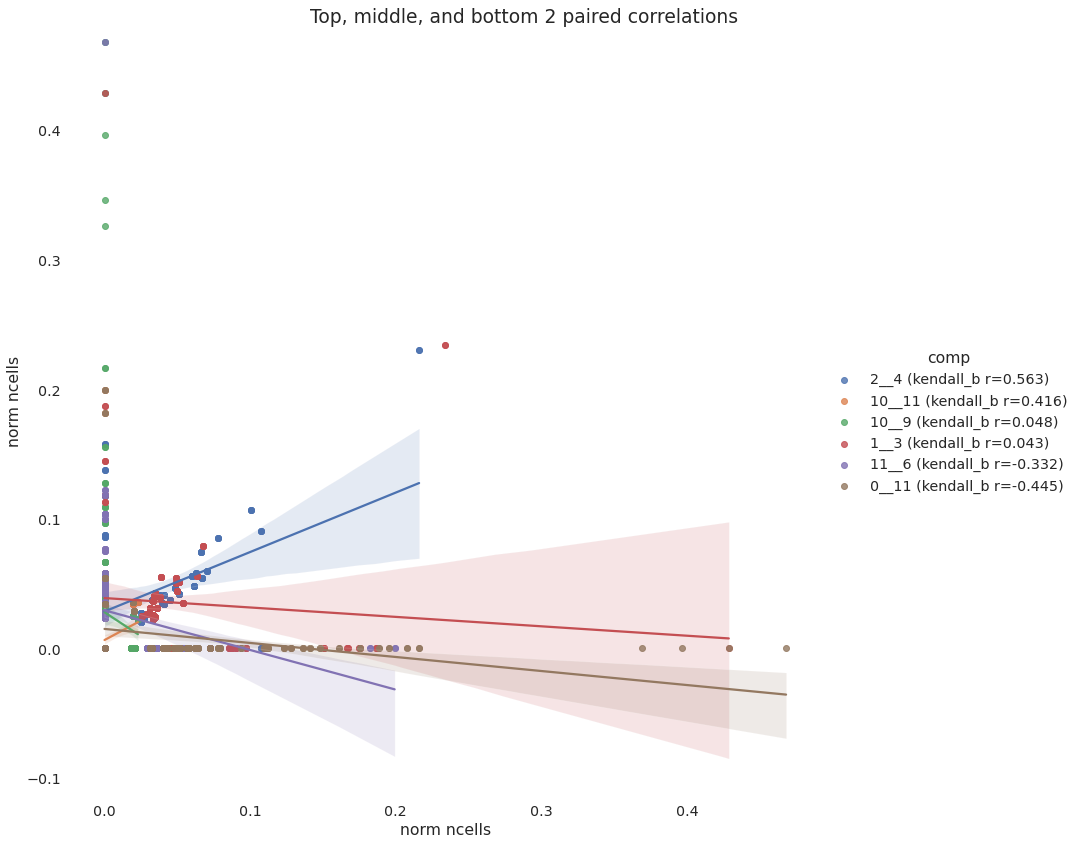

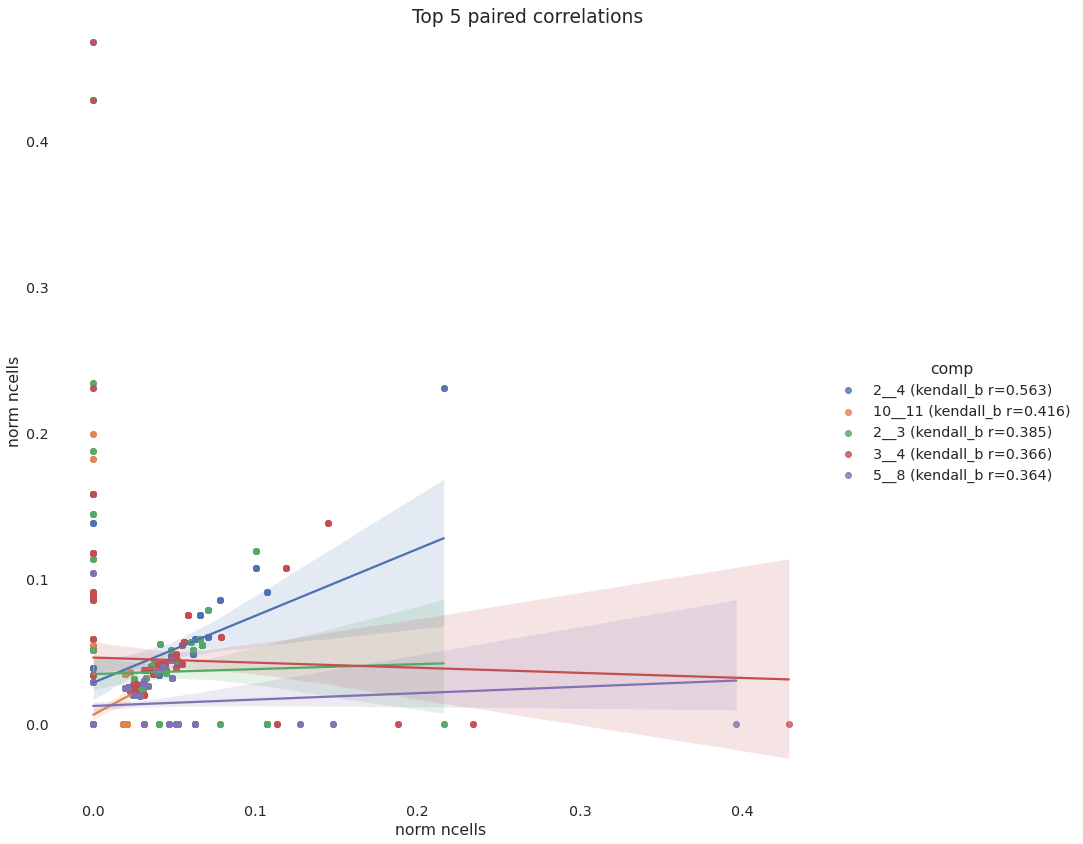

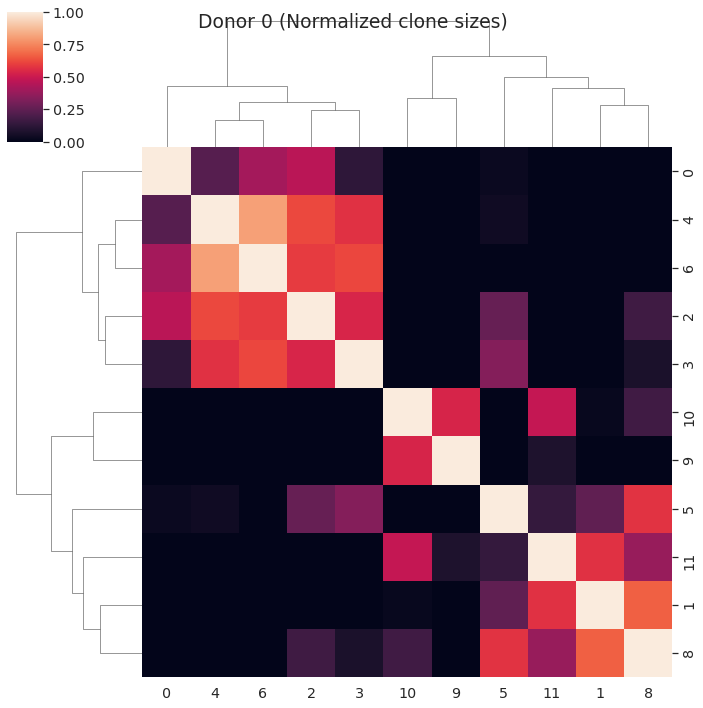

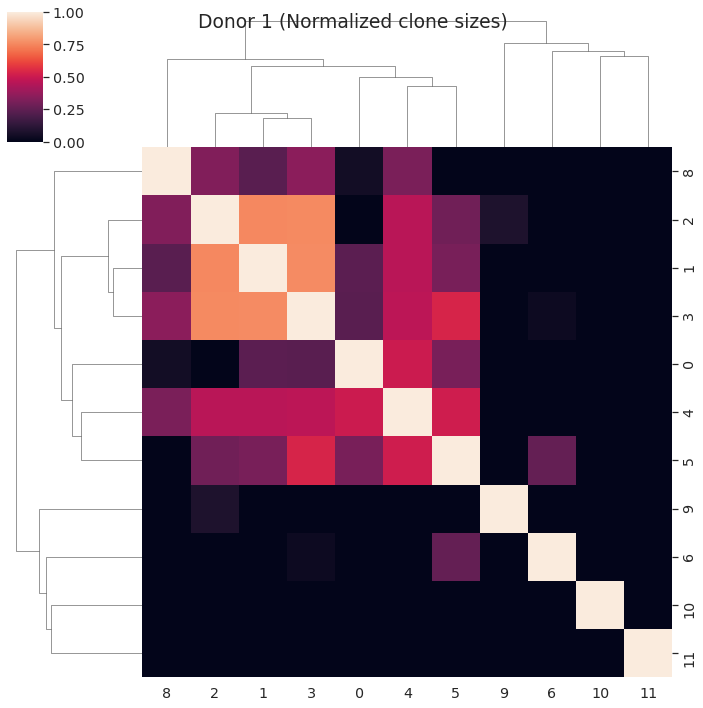

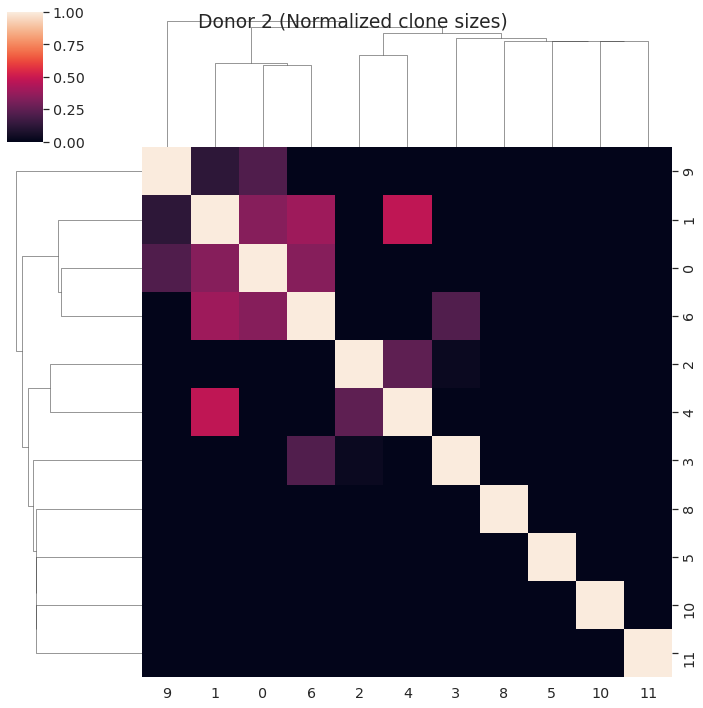

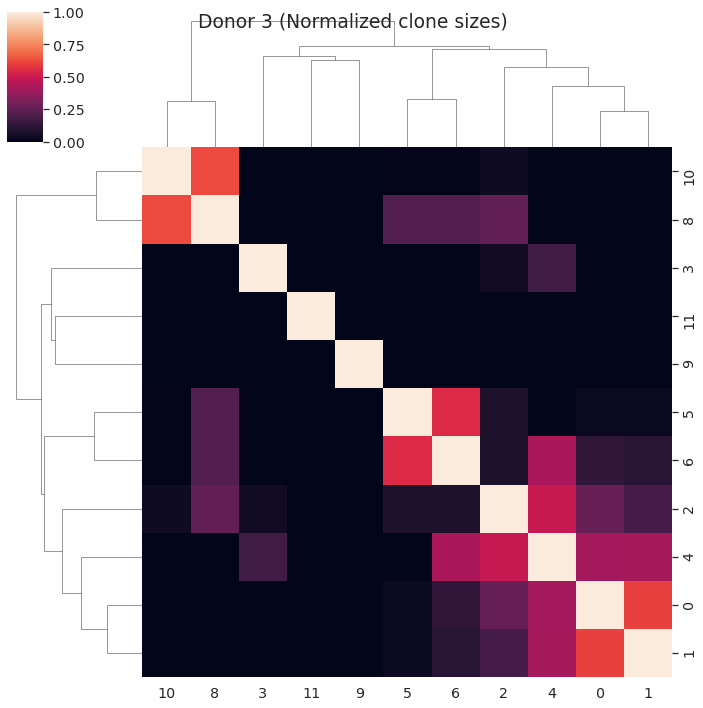

In [18]:
filt_clone_counts = keep_top_clones(clone_counts, min_cell=min_cell)
clone_norm = filt_clone_counts.copy()

clone_norm["ncells"] = np.log2(1+clone_norm["ncells"])
clone_sums = filt_clone_counts.groupby(["donor", "name"]).sum()["ncells"]
clone_sums


clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["donor"], x["name"])] , axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor", "nuclear_clusters"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
clone_norm_combined



clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1, args=(clone_norm,))),axis=1).fillna(0)
#norm_corr_df = clone_norm_df.drop(["ncells", "donor"],axis=1).corr(method="spearman")

norm_corr_df, norm_pval_df = get_corr(clone_norm_df, corr_method)
norm_corr_df.to_csv(join(outdir, "normClones_correlation.csv"))

sns.clustermap(norm_corr_df.loc[(~norm_corr_df.isnull().all(axis=1)),(~norm_corr_df.isnull().all())], vmin=0, vmax=1)
plt.suptitle("Fate correlation (all donors, normalized within each clone)")
hs(join(outdir, "normClones_allDonors.png"), to_pdf=True)



plot_repr_corr(clone_norm_df, norm_corr_df, label="norm ncells", out_f=join(outdir, "normClones_fateCorr_scatter_allDonors.png"))

plot_repr_corr(clone_norm_df, norm_corr_df, label="norm ncells", top=True, 
               out_f=join(outdir, "top_normClones_fateCorr_scatter_allDonors.png"))

for don, val in clone_norm_df.groupby("donor"):
    #corr_df = val.drop(["ncells", "donor"],axis=1).corr(method="spearman")
    corr_df, pval_df = get_corr(val, corr_method)
    sns.clustermap(corr_df.loc[(~corr_df.isnull().all(axis=1)),(~corr_df.isnull().all())].fillna(0), vmin=0, vmax=1)
    plt.suptitle(f"Donor {don} (Normalized clone sizes)")


---

## e) Separate clones into conditions and run for combined and separate
(no min_cell)

In [19]:
cl_cond_counts_df = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor", "name"]).size().reset_index().rename({0:"ncells"}, axis=1)
cl_cond_counts_df
wide_cl_cond_counts_df = cl_cond_counts_df.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor",
                                                                                       "name"], values="ncells").fillna(0)
wide_cl_cond_counts_df

nuclear_clusters         0    1   10   11   12   13   14    2    3    4    5  \
condition donor name                                                           
Flt3l     0     0_0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                0_1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                0_12   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
                0_120  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                0_122  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Input     3     3_5    6.0  8.0  1.0  0.0  0.0  0.0  0.0  3.0  3.0  1.0  5.0   
                3_6    8.0  1.0  1.0  0.0  0.0  0.0  0.0  2.0  6.0  3.0  4.0   
                3_7    3.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  4.0  0.0  7.0   
                3_8    2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0   
                3_9    1.0  2.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0   

nuclear_clusters         6    7    8     9  
condition donor name                        
Flt3l     0     0_0    0.0  0.0  0.0  13.0  
                0_1    0.0  0.0  0.0   1.0  
                0_12   0.0  0.0  0.0   0.0  
                0_120  0.0  0.0  0.0   2.0  
                0_122  0.0  0.0  0.0   1.0  
...                    ...  ...  ...   ...  
Input     3     3_5    2.0  0.0  4.0   0.0  
                3_6    4.0  0.0  3.0   0.0  
                3_7    4.0  0.0  4.0   0.0  
                3_8    1.0  0.0  1.0   0.0  
                3_9    0.0  0.0  0.0   0.0  

[380 rows x 15 columns]

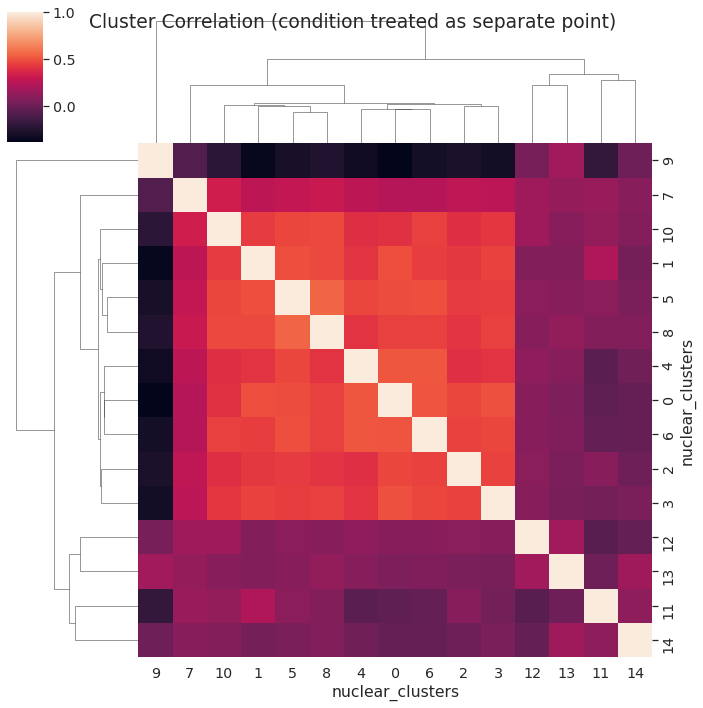

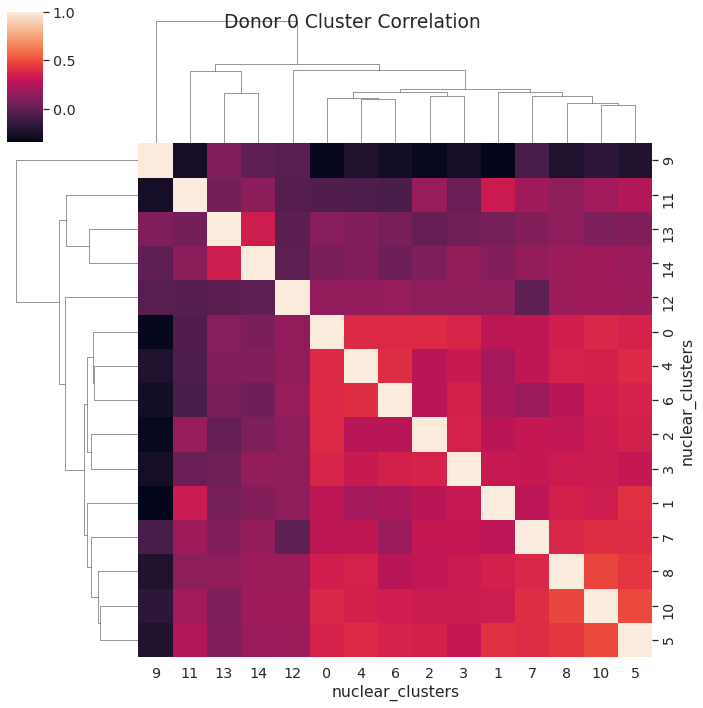

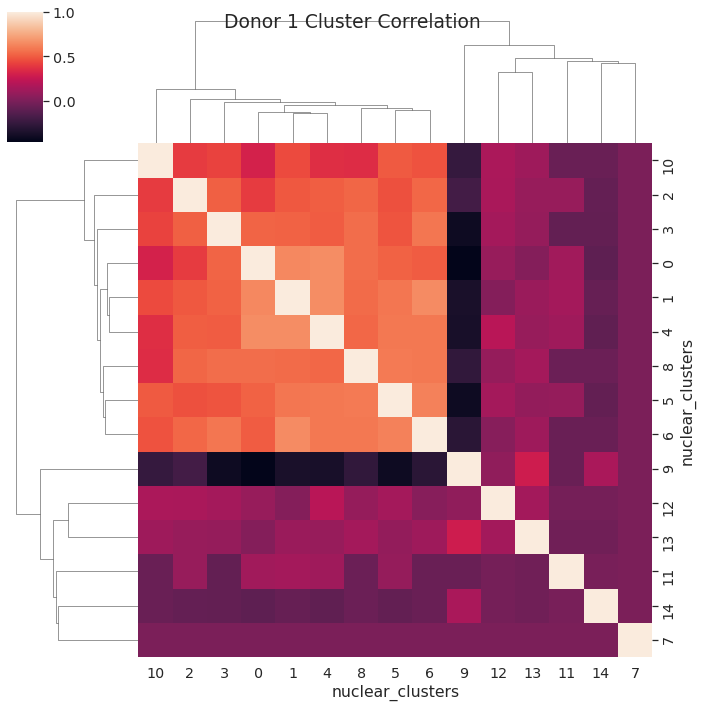

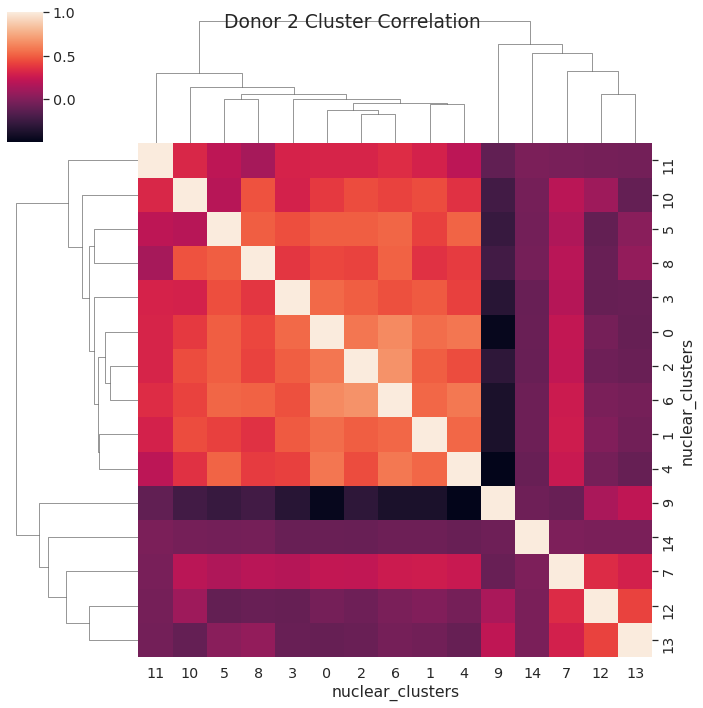

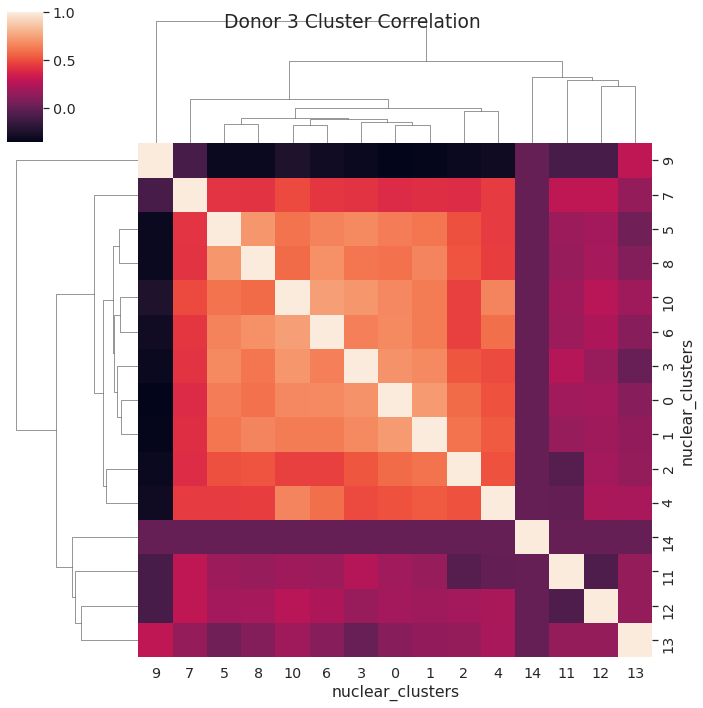

In [20]:
log2_clone_counts_df = wide_cl_cond_counts_df.copy()
log2_clone_counts_df[hue_order] = np.log2(1+log2_clone_counts_df[hue_order])

#cond_corr_df = log2_clone_counts_df.corr(method="spearman")
cond_corr_df, cond_pval_df = get_corr(log2_clone_counts_df, corr_method)


cond_corr_df
sns.clustermap(cond_corr_df)
hs(join(outdir, "fateCorr_sepCond_allDonors.png"), to_pdf=True)

plt.suptitle("Cluster Correlation (condition treated as separate point)")
for don, val in log2_clone_counts_df.reset_index().groupby("donor"):
    corr_df, pval_df = get_corr(val, corr_method=corr_method)

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} Cluster Correlation")

## Get top, middle, and bottom 2 correlations - Conditions treated separately

[nuclear_clusters              0         1                      comp
 condition donor name                                               
 Flt3l     0     0_0    0.000000  0.000000  5__8 (kendall_b r=0.549)
                 0_1    0.000000  0.000000  5__8 (kendall_b r=0.549)
                 0_12   0.000000  0.000000  5__8 (kendall_b r=0.549)
                 0_120  0.000000  0.000000  5__8 (kendall_b r=0.549)
                 0_122  0.000000  0.000000  5__8 (kendall_b r=0.549)
 ...                         ...       ...                       ...
 Input     3     3_5    2.584963  2.321928  5__8 (kendall_b r=0.549)
                 3_6    2.321928  2.000000  5__8 (kendall_b r=0.549)
                 3_7    3.000000  2.321928  5__8 (kendall_b r=0.549)
                 3_8    1.584963  1.000000  5__8 (kendall_b r=0.549)
                 3_9    0.000000  0.000000  5__8 (kendall_b r=0.549)
 
 [380 rows x 3 columns],
 nuclear_clusters              0    1                      comp
 condition d

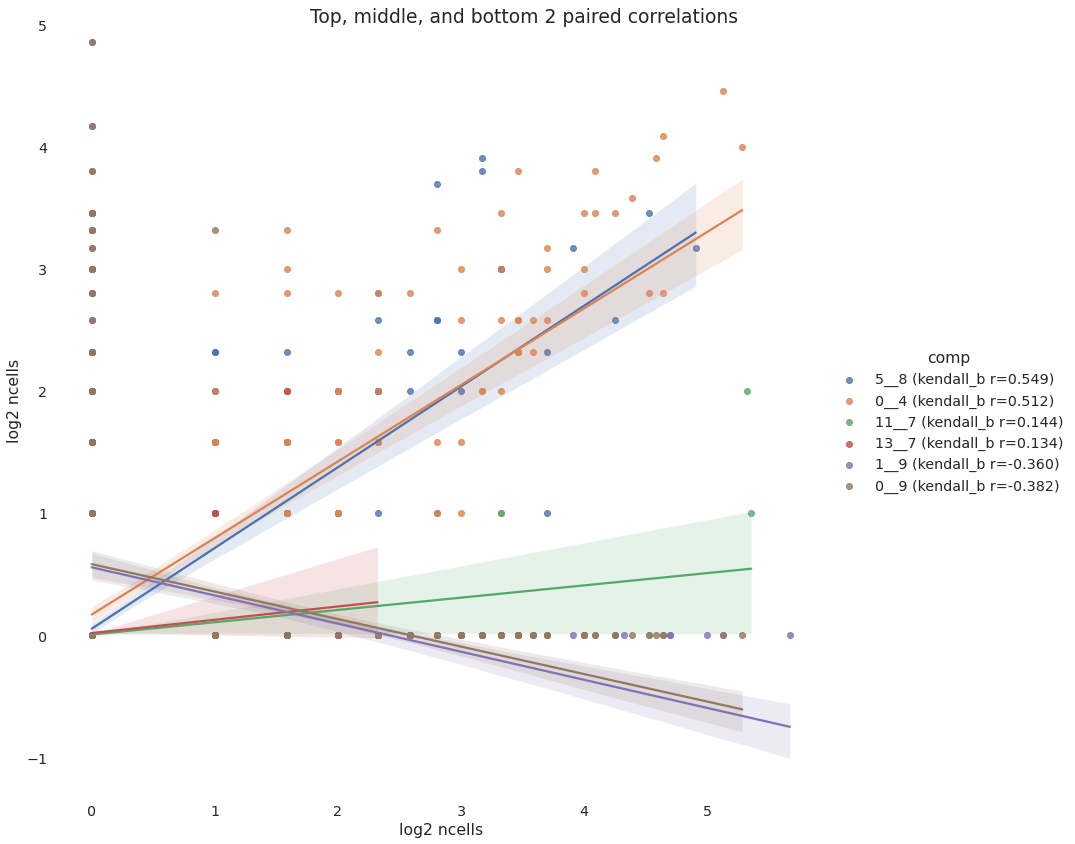

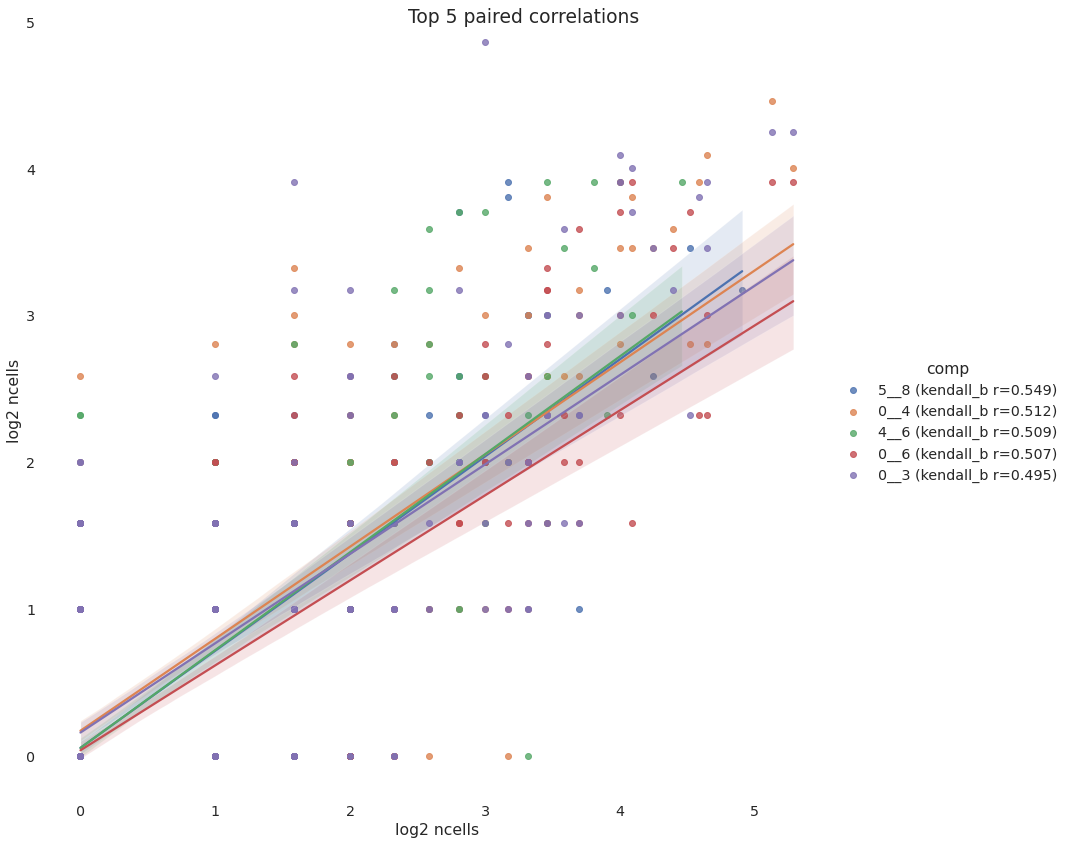

In [21]:
plot_repr_corr(log2_clone_counts_df, cond_corr_df, label="log2 ncells", 
               out_f=join(outdir, "fateCorr_scatter_sepCond_allDonors.png"))

plot_repr_corr(log2_clone_counts_df, cond_corr_df, label="log2 ncells", top=True,
               out_f=join(outdir, "top_fateCorr_scatter_sepCond_allDonors.png"))



## Pairplot of clusters

In [22]:
#g = sns.pairplot(log2_clone_counts_df.reset_index().drop(["name","donor"], axis=1), hue="condition", height=4)

---

---

---

In [23]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/fate_correlation/minC5_corr.Kendall.b'